<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Web_Scrape_Amazon_Reviews3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Scrape Amazon product reviews, extract some data elements and create a data frame. 

In [1]:
# Import the required libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv


*   requests allows you to send HTTP requests to a server which returns a Response Object with all the response data (i.e. HTML).

*   beautifulsoup (bs4) is used to pull data out of HTML files and convert the data to a BeautifulSoup object, which represents the HTML as a nested data structure.
*   pandas is used for data analysis and manipulation.
*   urllib can be used for many purposes, including reading website content, making HTTP and HTTPS requests, sending request headers, and retrieving response headers. 
*  csv module implements classes to read and write tabular data in CSV format.

**Review the Web Page's HTML Structure**

We need to understand the structure and contents of the HTML tags within the web pages. We will be using the Amazon webpage and searching on Apple Watch Series 7 GPS + Cellular (shown below). You can find this webpage by selecting this link https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/dp/B09PB1PTH8/ref=sr_1_4?crid=2BASPR6FQKQL&keywords=apple%2Bwatch%2Bseries%2B7&qid=1655316645&sprefix=apple%2Bwatch%2Caps%2C173&sr=8-4&th=1 and scroll down to the reviews section.

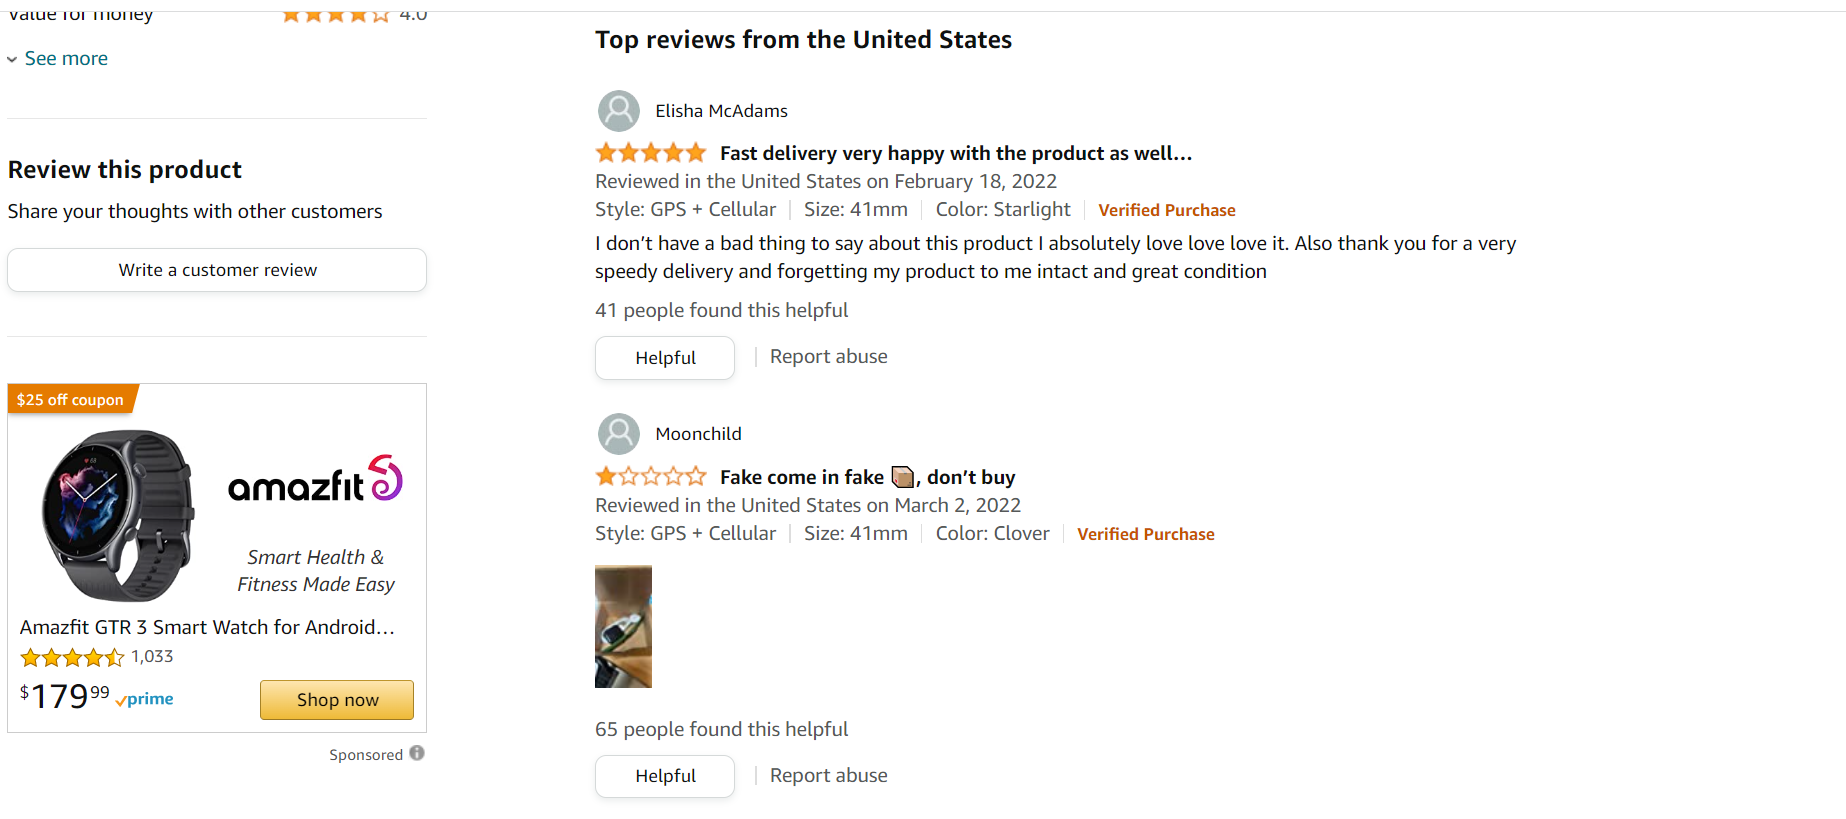

We can scrape this webpage by parsing the HTML of the page and extracting the information needed for our dataset. To scrape some data from this web page right click anywhere on the web page, select inspect from the drop down list, click the arrow icon on the upper left-hand side of the screen with the HTML and then click the name (Elisha MsAdams) in the review section of the webpage. This will result in the following screen being displayed.

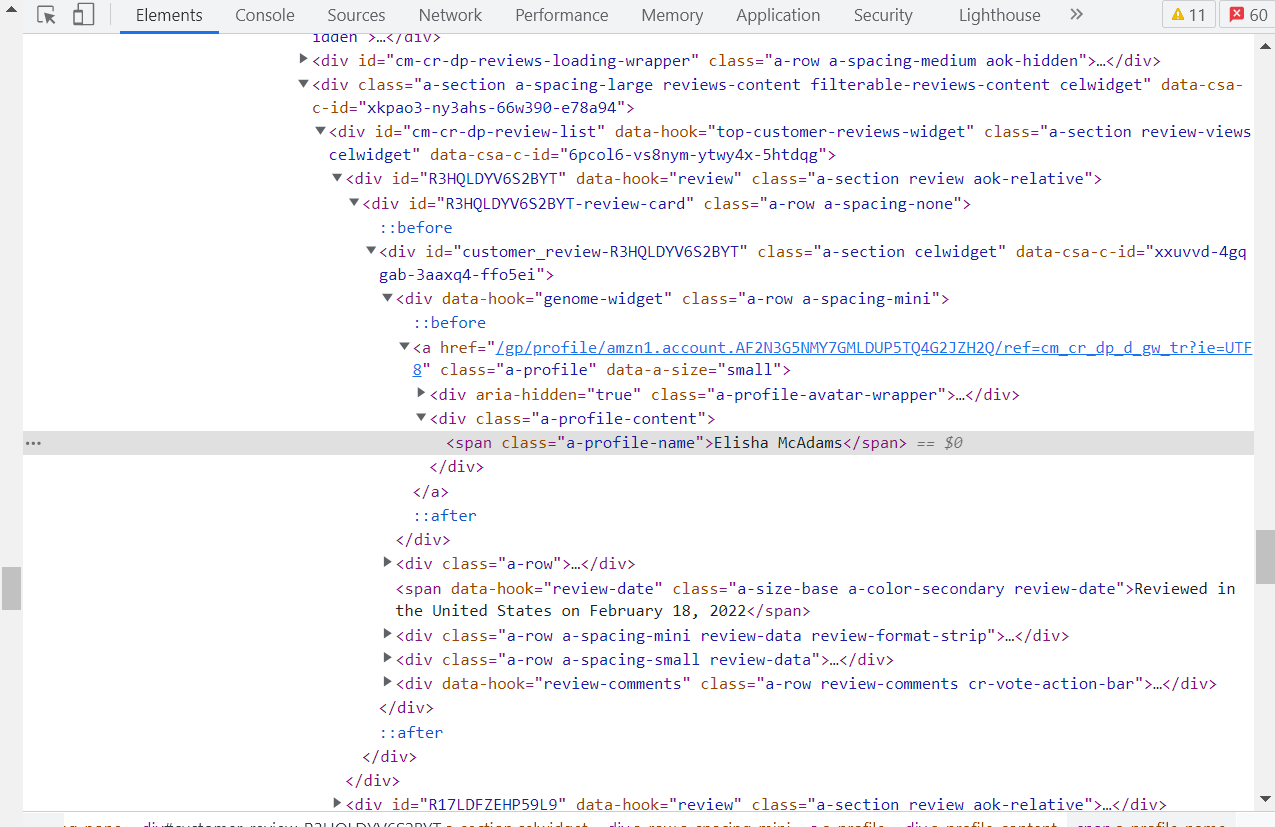

On the HTML screen, you will see highlighted the HTML line for the reviewer name Elisha MsAdams.

The <span is the tag for the HTML line and the class is "a-profile-name".

So, if you wanted to find, extract and capture all the reviewer names on the web page you would do the following steps.
1. Find all the HTML lines with a "span" tag with class = "a-profile-name".

2. Extract the data elements and build a list containing the reviewer names. 

The code for finding and extracting reviewer names will be shown later in this article. We will find, extract and store the other data elements on the web page following a similar procedure as described above.

For this project we will be using Amazon webpages and searching on Apple Watch Series 7 GPS + Cellular and seeing all reviews. You can find this webpage by selecting this link https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews 

After reviewing the product reviews for the Apple watch series 7 webpage, I have decided to extract the following data elements from the reviews: 

*   Reviewer Names 
*   Reviews 

**Retrieve HTML data and Extract the Data Elements**

When I started this project and was running the code to access and extract data elements from the web pages, I was blocked numerous times by Amazon's anti-bot detectors and was denied access to thier web pages. To resolve this issue, I decided to use ScraperAPI proxy manager. ScraperAPI handles proxies, browsers, and CAPTCHAs, so you can get the HTML from any web page with a simple API call without being blocked. You can learn more about how to use proxies in python by going to this link https://python.plainenglish.io/using-proxies-when-web-scraping-in-python-1256d2d5549e  

We will start by creating an object (urls) containing the website address for the pages we want to scrape. We will scrape the first five pages of the search results. When you search and get the results for the reviews and click Next page button, the web page address changes slightly.    

In [ ]:
# Define a list of URL's that will be scraped. 

list_of_urls = ['https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews', 
                'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2',
                'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3',
                'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber=4',
                'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&pageNumber=5']


Next we will send a get request for the specific URL's HTML to the web server. Then retrieve the HTML data that the web server sends back and convert the data into a BeautifulSoup object. For each of the data elements we want to extract, we will find all the HTML lines that are within a specific tag and class. We will then extract the data elements and store the data in a list. For this project we are extracting reviewer names and review text.

In [ ]:
# Retrieve each of the url's HTML data and convert the data into a beautiful soup object.  
# Find, extract and store reviewer names and review text into a list.

names = []
reviews = []
data_string = ""

for url in list_of_urls: 
    params = {'api_key': "enter your API key here", 'url': url}
    response = requests.get('http://api.scraperapi.com/', params=urlencode(params))
    soup = BeautifulSoup(response.text, 'html.parser')

    for item in soup.find_all("span", class_="a-profile-name"):
      data_string = data_string + item.get_text()
      names.append(data_string)
      data_string = ""  
    
    for item in soup.find_all("span", {"data-hook": "review-body"}):
      data_string = data_string + item.get_text()
      reviews.append(data_string)
      data_string = ""  


The HTML content of the webpages will be parsed and scraped using Beautiful Soup. Beautiful Soup is a great tool for parsing and scraping websites because of the numerous functions it provides to extract data from HTML. To learn more about BeautifulSoup select this link (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#specifying-the-parser-to-usehttps://) 


**Create the Dictionary** 

We will create a dictionary that will contain the data names and values for the data elements that were extracted.  

In [ ]:
# Create the dictionary.
reviews_dict = {'Reviewer Name': names, 'Reviews': reviews}

In [ ]:
# Print the lengths of each list.  
print(len(names), len(reviews))

72 50




**Create the Data Frame**

We need to adjust for missing values in columns. This step will create the DataFrame as each key was a row and like this the missing values are actually missing columns which is no problem for pandas (only missing rows lead to ValueError during creation). We need to transpose the DataFrame (flip the axis) and change the rows to columns. 

In [ ]:
# Create a new dataframe.
df = pd.DataFrame.from_dict(reviews_dict, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Reviewer Name,Elisha McAdams,Moonchild,Moonchild,Moonchild,Elisha McAdams,Amazon Customer,Rebecca Liller,Rebecca Liller,Valerie,Misty,...,Sheila Larson,ChrisThomerson,James Shubert,James Shubert,Mixed Media artist,Hariprasad Bezawada,freakygeeky,Joy G.,Ibrahim Elmetwally,jeanette s.
Reviews,,\nI don’t have a bad thing to say about this p...,\nIt is as wonderful as Apple products always ...,\nSo far I love or. No issues with delivery or...,\nI was nervous to purchase a renewed watch an...,\nI am totally in love with the Apple products...,\nBought as refurbished. Looks brand new and c...,\nMy watch arrived quickly and the set up was ...,\nCame in a timely manner and is exactly what ...,\nBattery barely lasts a day. Need to learn h...,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Delete all the columns that have missing values.
df.dropna(axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Reviewer Name,Elisha McAdams,Moonchild,Moonchild,Moonchild,Elisha McAdams,Amazon Customer,Rebecca Liller,Rebecca Liller,Valerie,Misty,...,VILMAR JUNIOR DA SILVA,VILMAR JUNIOR DA SILVA,Dennis L.,NATHALIE SABBAGH,NATHALIE SABBAGH,Elisha McAdams,Moonchild,ERIC P FELTON,thevin,thevin
Reviews,,\nI don’t have a bad thing to say about this p...,\nIt is as wonderful as Apple products always ...,\nSo far I love or. No issues with delivery or...,\nI was nervous to purchase a renewed watch an...,\nI am totally in love with the Apple products...,\nBought as refurbished. Looks brand new and c...,\nMy watch arrived quickly and the set up was ...,\nCame in a timely manner and is exactly what ...,\nBattery barely lasts a day. Need to learn h...,...,\nRecomendados al 100%\n,\nI can’t even charge my watch right off the b...,"\nProduct is wonderful, BUT says with charger....",\nThe watch band started splitting after a few...,\nWatch was locked by previous owner. Obvious...,\nApple Watch changer not received\n,"\nBought a new one, instantly connected..\n","\nArrived not charged, I began charging it and...",\nThanks I need my money back. It’s very bad. ...,\nThis is not a brand new watch\n


In [ ]:
# Transpose the dataframe.
prod_reviews = df.T
print(prod_reviews.head(10)) 

     Reviewer Name                                            Reviews
0   Elisha McAdams                                                   
1        Moonchild  \nI don’t have a bad thing to say about this p...
2        Moonchild  \nIt is as wonderful as Apple products always ...
3        Moonchild  \nSo far I love or. No issues with delivery or...
4   Elisha McAdams  \nI was nervous to purchase a renewed watch an...
5  Amazon Customer  \nI am totally in love with the Apple products...
6   Rebecca Liller  \nBought as refurbished. Looks brand new and c...
7   Rebecca Liller  \nMy watch arrived quickly and the set up was ...
8          Valerie  \nCame in a timely manner and is exactly what ...
9            Misty  \nBattery barely lasts a day.  Need to learn h...


In [ ]:
# Remove special characters from review text.
prod_reviews['Reviews'] = prod_reviews['Reviews'].str.replace('\n','')
prod_reviews.head(10)

,Reviewer Name,Reviews
0,Elisha McAdams,
1,Moonchild,I don’t have a bad thing to say about this pro...
2,Moonchild,It is as wonderful as Apple products always ar...
3,Moonchild,So far I love or. No issues with delivery or p...
4,Elisha McAdams,I was nervous to purchase a renewed watch and ...
5,Amazon Customer,I am totally in love with the Apple products I...
6,Rebecca Liller,Bought as refurbished. Looks brand new and cam...
7,Rebecca Liller,My watch arrived quickly and the set up was se...
8,Valerie,Came in a timely manner and is exactly what th...
9,Misty,Battery barely lasts a day. Need to learn how...



**Convert Data Frame to a CSV File**

If needed, we can create a csv file from the data frame that was created in the previous step. 

In [ ]:
# Convert dataframe to CSV file.
prod_reviews.to_csv('reviews.csv', index=False, header=True)

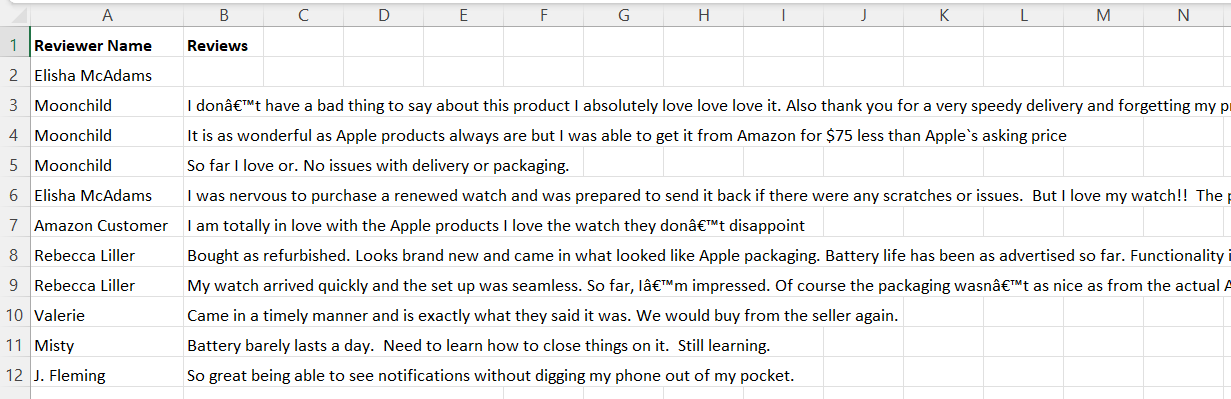